# Базовая модель

## Описание модели

В модели присутствуют два вида агентов – **n** продавцов и **m** покупателей. В модели рассматривается только один вид товара, все продавцы хотят его продать, все покупатели его купить. 

## Продавцы

У каждого продавца **s** определено минимальное значение цены **s.min_price**, за которую он готов продать товар. Ниже этой цены продавцу невыгодно продавать товар. У разных продавцов значение **s.min_price** может быть разным. У каждого продавца значение **s.min_price** определяется в начале процесса моделирование как случайное число, равномерно распределенное на отрезке **[saller_min, saller_max]**. Величины **saller_min** и **saller_max** одинаковы для всех продавцов и являются параметрами модели.

Также у каждого продавца **s** есть значение ожидаемой цены продажи **s.expect_price**, которая всегда больше или равна, чем **s.min_price**. Изначально **s.expect_price** равно **saller_max**, но в дальнейшем может уменьшаться или увеличиваться на величину **saller_delta**, одинаковую для всех продавцов и являющейся параметром модели. Изменение **s.expect_price** происходит после взаимодействия данного продавца **s** с покупателем. Правила данного изменения будут описаны ниже. 


## Покупатели

У каждого покупателя **с** определено максимальное значение цены **c.max_price**, за которую он готов купить товар. Выше этой цены покупателю невыгодно покупать товар. У разных покупателей значение **c.max_price** может быть разным. У каждого покупателя значение **c.min_price** определяется в начале процесса моделирования как случайное число, равномерно распределенное на отрезке **[consumer_min ,consumer_max]**. Величины **consumer_min** и **consumer_max** одинаковы для всех продавцов и являются параметрами модели.
Также у каждого покупателя есть значение ожидаемой цены продажи **c.expect_price**, которая всегда меньше или равна, чем **c.max_price**. Изначально **c.expect_price** равно **0**, но в дальнейшем может уменьшаться или увеличиваться на величину **consumer_delta**, одинаковую для всех покупателей и являющейся параметром модели. Изменение **c.expect_price** происходит после взаимодействия данного покупателя c продавцом. Правила данного изменения будут описаны ниже. 


## Взаимодействие

На каждом шаге моделирования случайным равновероятным образом выбирается один продавец **s** и один покупатель **c**. Между ними происходит попытка заключения сделки. 

Если **s.expect_price** меньше или равно **c.expect_price** покупателя, то: 
1. сделка происходит,
2. **s.expect_price** увеличивается на **s.delta**,
3. **c.expect_price** уменьшается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки удовлетворяют ожиданиям как продавца, так и покупателя. Реальная стоимость купли-продажи может быть определена как **(s.expect_price + c.expect_price) / 2**, однако в данной модели эта величина никак не учитывается. 

При этом продавец считает, что если он сейчас продал товар за стоимость как минимум **s.expect_price**, то в дальнейшем он может его продать немного дороже и **s.expect_price** можно немного увеличить.

А покупатель считает, что он купил сейчас товар за стоимость не более **c.expect_price**, то в дальнейшем он может покупать товар немного дешевле и **c.expect_price** можно немного уменьшить.

Если **s.expect_price** больше, чем **c.expect_price** покупателя, то:
1. сделка не происходит,
2. **s.expect_price** уменьшается на **s.delta**,
3. **c.expect_price** увеличивается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки не удовлетворяют ожиданиям как продавца, так и покупателя.

При этом продавец считает, что если он сейчас не продал товар за стоимость **s.expect_price**, то для продажи в следующий раз **s.expect_price** надо немного уменьшить.

А покупатель считает, что если он сейчас не смог купить товар за **c.expect_price**, то для покупки в следующий раз **c.expect_price** надо немного увеличить.


## Анализ


Модель на каждом такте должна учитывать:
1. Среднее значение **s.expect_price** по всем продавцам,
2. Минимальное значение **s.expect_price** по всем продавцам,
3. Среднее значение **с.expect_price** по всем покупателям,
4. Максимальное значение **с.expect_price** по всем покупателям,
5. Долю состоявшихся сделок на данный момент.

## Параметры модели


* **n** - количество продавцов, 
* **m** - количество покупателей,
* **[saller_min, saller_max]** – интервал, из которого определяется **s.min_price** для каждого продавца,
* **saller_delta** - величина изменения ожидаемой цены у покупателя,
* **[consumer_min ,consumer_max]** – интервал, из которого определяется **с.max_price** для каждого покупателя,
* **consumer_delta** - величина изменения ожидаемой цены у продавца.


## Технические требования 


* Модель должна быть построена в объектно-ориентированном подходе. Каждый вид агента описывается определенным классом, а каждый агент, соответственно, является объектом данного класса.
* Модель также является классом, в конструктор которого передаются все параметры модели.
* Модель должна иметь метод **run(n)**, который моделирует **n** последующих шагов модели 

## Построение графиков

* Модель должна иметь метод **plot_dynamics(i,j)**, который строит графики анализа поведения моделей на интервале шагов с **i** по **j**.
* Модель должна иметь метод **plot_supply_and_demand(i)**, который строит графики спроса и предложения в момент времени **i**.

## Построение графа (схемы)


Модель должна иметь метод **plot_graph(i, j)**, который строит и визуализирует граф, в котором вершинами являются продавцы и покупатели, а ребра обозначают количество совершенных или не совершенных между ними сделок в периоде с **i** по **j**. Покупатели обозначены синим цветом, продавцы обозначены пурпурным. Зеленые ребра обозначают удачные сделки между продавцом и покупателем. Красные ребра обозначают неудачные сделки. Толщина ребра показывает количество сделок между данными продавцом и покупателем относительно общего количества сделок.

# Реализация базовой модели

## Подключение библиотек

In [1]:
import random
import matplotlib.pyplot as plt
from tqdm import trange # Модуль для визуализации прогресс-бара при запуске модели
import graphviz # Модуль для визуализации графов

## Реализация базовой модели

In [2]:
def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # { 
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''
        
        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        
        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась
            
            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()
            
        else:
            # Сделка не состоялась
            
            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()
            

    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара
            
            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)
            
            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)
            
            # Моделируем сделку
            self.deal(consumer_id, seller_id)
            

    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
        
        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''
        
        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию. 
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")
            
            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию. 
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок 
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок 
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end    
        for i in range(start, end+1):
            
            
            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



## Запуск модели

In [165]:
random.seed(42)
model = Model(num_of_consumers=10,
              num_of_sellers=1,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(1000)

100%|███████████████████████████████████| 1001/1001 [00:00<00:00, 210609.40it/s]


## Визуализация модели

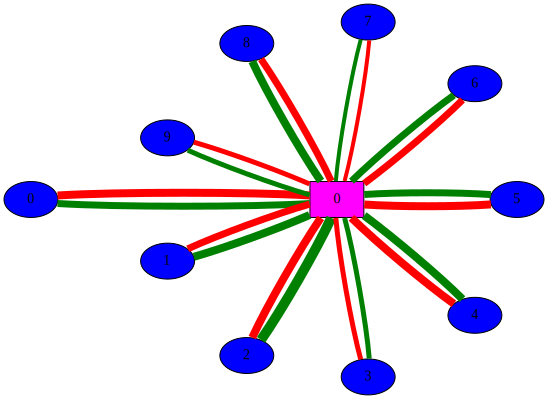

In [166]:
model.plot_graph(100, 200)

## Результаты моделирования

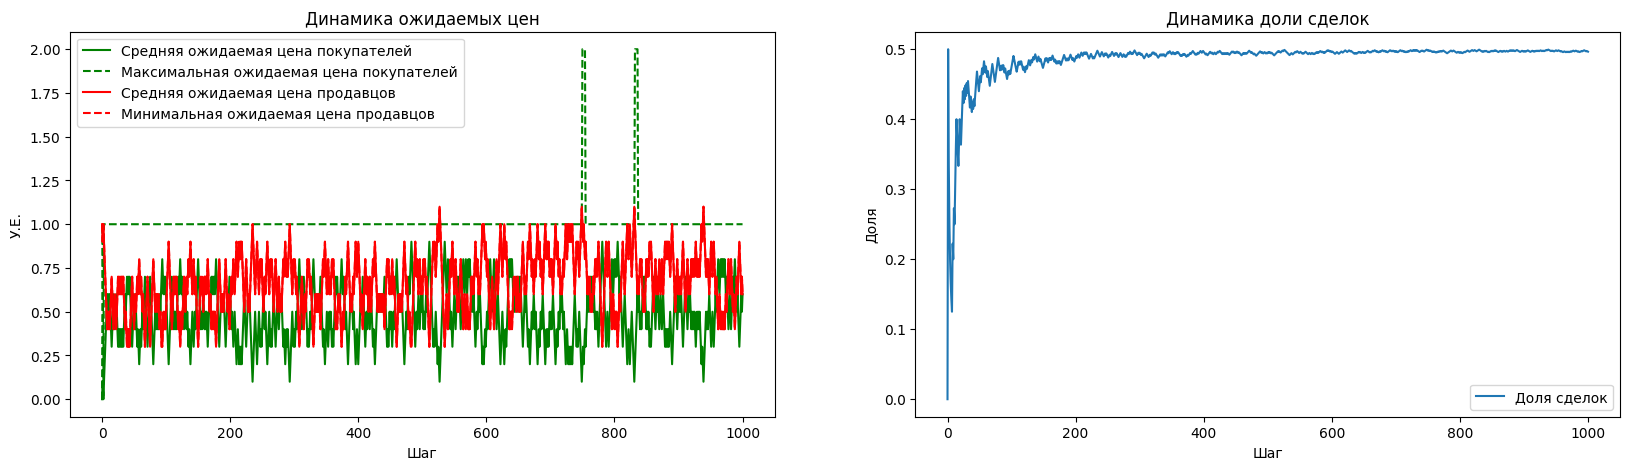

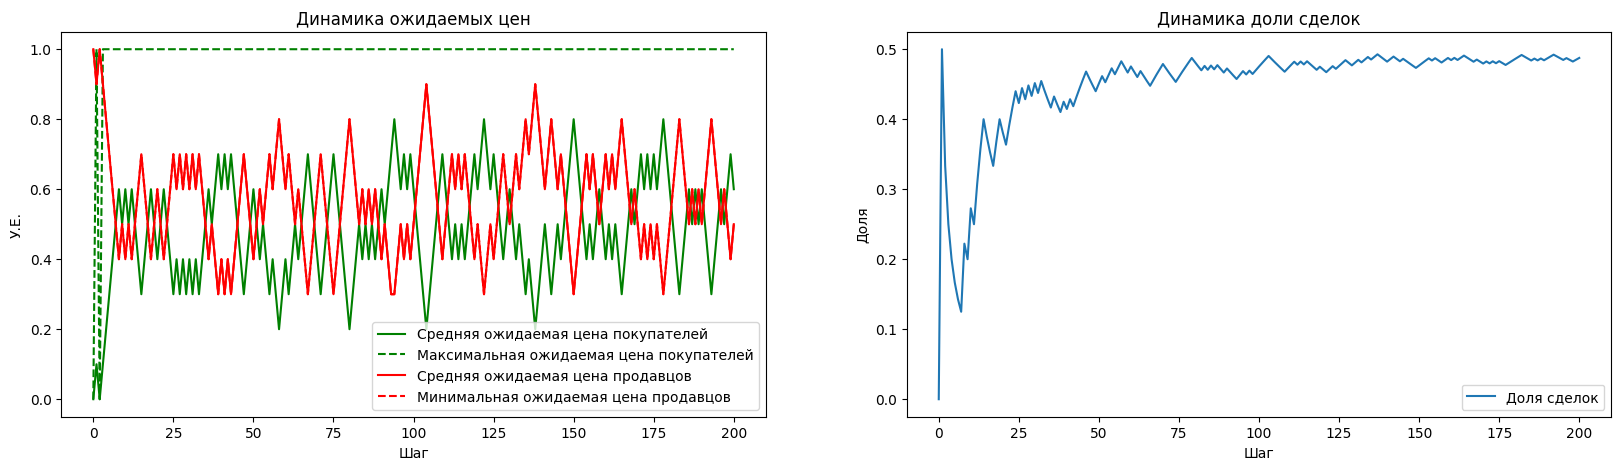

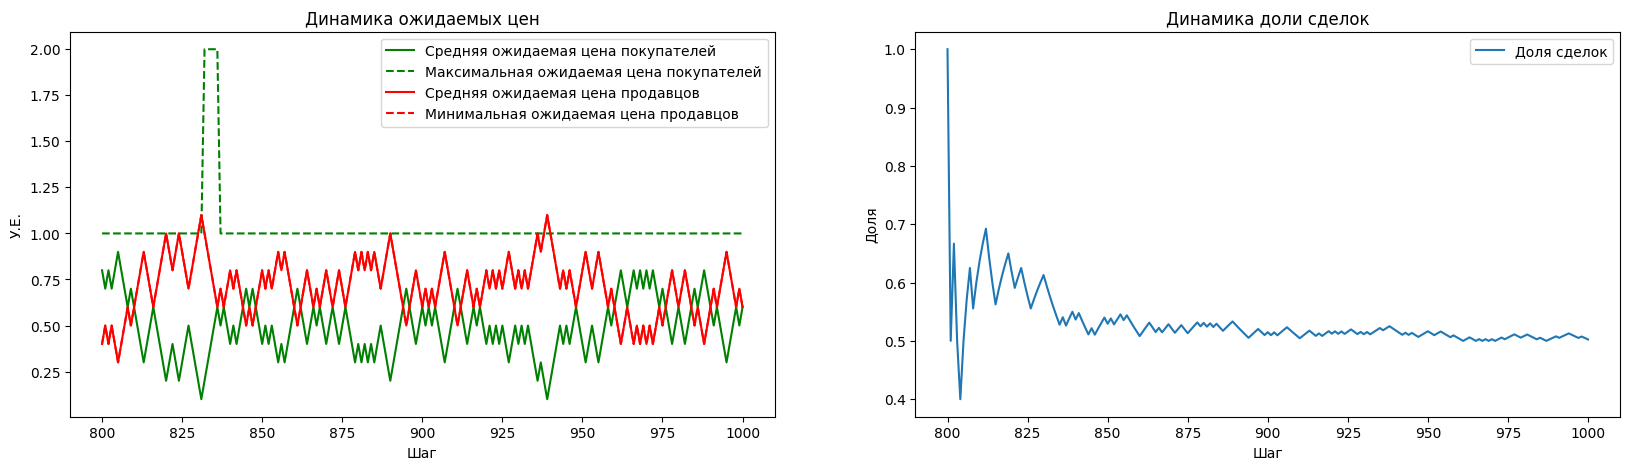

In [167]:
model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)
model.plot_dynamics(800, 1000)

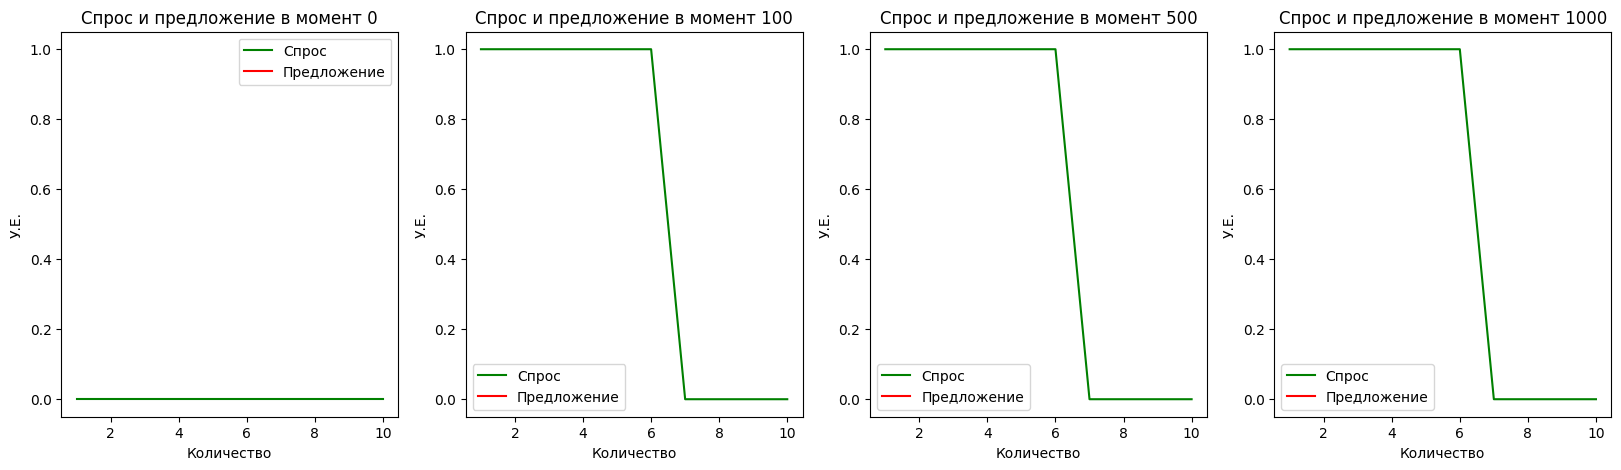

In [168]:
model.plot_supply_and_demand([0, 100, 500, 1000])

# Задания

При выполнения всех заданий Вам необходимо писать текст (в Markdown ячейках), вызывать существующие фрагменты кода и писать собственный код. При реализации кода придерживайтесь объектно-ориентированного подхода. Обращаем Ваше внимание, что в данных заданиях будет в первую очередь будет оцениваться Ваши интерпретации и выводы относительно свойств и поведения моделей.   

## Задание 1 (1 балл)

Запустите базовую модель с разными параметрами. Проанализируйте, как меняется поведение модели в зависимости от изменения параметров. Опишите эти изменения.

Проинтерпретируйте (дайте объяснение) результаты работы базовой модели. В частности, обратите внимание на следующие аспекты:
* Ожидаемые цены попадают в некоторый интервал.
* Доля сделок выходит на некоторый постоянный уровень. 
* Скорости сходимости зависят от количества продавцов и покупателей и шага цены.
* Опишите характеристики изменений диаграмм связей со временем.

Из предлагаемых параметров модели мы можем изменять следующие:

* Объем рынка
* Коридор цен производителя (минимальная и максимальная цена) и коридор цен потребителей (минимальная и максимальная цена). Предпочтения потребителей и особенности производства товара.
* Изменение цены потребителя,  Изменение цены производителя. Маржинальный эффект от сделки, изучение влияние реакции агентов на результат сделки.


1) Пусть на заданном рынке будет "немного" производителей, пусть он будет один (при ощутимо большом количество потребителей можем брать просто достаточно маленькие значения (1-3 производителя при 10-15 потребителях).
При росте количество потребителей средняя ожидаемая цена продавцов (продавца) сильно колеблется, что довольно очевидно, ведь он является единственным продавцом на рынке, что гарантирует заключение сделки с ним. В то же время при большом количестве потребителей цена потребителей колеблется несильно, что опять-таки связано с особенностями показателя средней цены:  чем больше будет потребителей, тем сложнее меньше будет изменяться цена потребителя в таких условиях. При увеличении количества периодов доля успешных сделок будет стремится к 0.5 в данных условиях задачи.

Текущая рыночная ситуация напоминает монополию, однако рамки модели предполагают, что производитель не может влиять на цену, однако зафиксируем, что цена реализации сделки в основном 0.5 уе., судя по графикам рыночного предложения и спроса, на рынке чаще наблюдается дефицит.

2) Теперь зафиксируем ситуацию, близкую к монопсонии (при ощутимо большом количество потребителей можем брать просто достаточно маленькие значения (1-3 потребителя при 10-15 производителях) без условия влияния потребителя на цену.
В этом случае ситуация противоположная: на рынке наблюдается избыток, средняя цена потребителя меняться довольно сильно, причем она колеблется на уровне 1 уе., что значительно выше ситуации, описанной в пункте 1. Доля сделок стремится к 0.5 в пределе.

3) Пусть теперь количество продавцов и потребителей примерно одинаковое (будет меняться от 1-2 агентов каждого вида до 10 агентов каждого вида, то есть минимизирует эффект влияния большинства 
При небольшом количестве участников рынка ситуация довольно стабильная , доля успешных сделок стремится к 0.5, цена колеблется в коридоре цены $(0.5 - \delta, 0.5 + \delta)$, однако довольно часто возникают ситуации, когда на рынке не существует равновесия, это связано с тем, что количество агентов мало, поэтому они взаимодействуют гарантировано достаточно часто (на каждой итерации или каждый 3-5 итераций), из-за чего для них довольно часто меняются цены, поэтому после каждого успешного совершения сделки следует неуспешная сделка, приводящая к снижению цены. 

При росте количества агентов прослеживается тренд роста цены (по графикам спроса-предложения на начальных этапах (100 итераций) цена находится на уровне 0.65, далее поднимается до 0.9 на 500 итерации, затем останавливается на уровне 1 на 1000 итерации. Доля сделок остается на уровне 0.5 в пределе.

#### Выводы из исследования объема рынка:
При большинстве потребителей при прочих равных цена реализации сделки меньше, так как потребитель хочет заплатить как можно меньше в силу ограниченности своего бюджета (согласно модели, он готов платить меньше при реализации сделки и больше при неуспешной сделке). Таким образом, демонстрируется аналог действия потребительского лобби.

При большинстве производителей при прочих равных цена реализации сделки больше, так как количество производителей значительно превосходит количество потребителей, а первые стремятся получить как можно больше прибыли, после каждой сделки, повышая минимальную цену продажи после каждой успешной сделки, в результате получается демонстрация аналога лобби производителей, которые добиваются большинством повышения цены.

При примерно равных количествах агентов каждого вида (их количество достаточно большое, то есть более 1-2) заметен тренд постепенного роста цена при условии 6 что цены потребителя изначально выше, чем цены производителя, в отличие от ситуаций, описанных выше. Предполагается, что на таком рынке изменение других экзогенных параметров модели будет выражено более явно, что объясняется тем, что у потребителей и производителей появляется больше маневренности в заключении сделок, не происходит значительного дефицита или избытка.

Возьмем достаточно большой рынок (пусть сбалансированный рынок - такой, что на нем примерно равное количество агентов обоих видов), отдельно рассмотрим случаи сильного превышения количества потребителей над количеством производителей (и наоборот). Брать достаточно большой рынок резание для изучения влияние стальных факторов, так как в этом случае 

1) Пусть теперь коридор цен потребителя значительно выше коридора цен производителя.
При сбалансированном рынке наблюдается тренд роста цены, так как изначально потребители высоко ценят этот товар и готовы платить за него больше, чем предлагают производители.

2) В ситуации, когда коридор цены производителя находится выше коридора цен потребителя, получаем, что на рынке будет отсутствовать равновесие, так как рыночное предложение будет лежать целиком выше рыночного спроса.

3) При совпадении промежутков небольшой длины и небольшом шаге изменения цены на рынке долго не будет равновесия, однако через некоторое время рынок стабилизируется и равновесие появится, причем цена будет установится примерно в середине ценового диапазона. 
Доля успешных сделок небольшая вследствие того, что рынок долго приходит в равновесие.

4) Увеличим диапазон цен: при совпадении промежутков рынок опять будет болг. приходить в равновесие, только на 500/1000 итераций появятся успешные сделки.

5) Пусть диапазоны не совпадают, но пересекаются, причем максимальная цена продавца изначально выше минимальной цены потребителя, тогда при сбалансированном рынке рынок опять будет долго искать равновесие

6) Пусть производителей больше, чем потребителей.
В этом случае доля успешных сделок будет стремится к 0.5, средняя цена покупателей резко значительно вырастет при условии, что диапазоны не совпадают, но пересекаются.


7) Пусть производителей меньше, чем потребителей.

При сохранении условия, что диапазоны не совпадают, но пересекаются, цена потребителя резко упадет, доля сделок сохранится на уровне 0.3 в пределе. 

8) Повторим рассуждения пунктов 5-7 для условия, что максимальная цена потребителя выше максимальной цены продавца.

При сбалансированном рынке доля сделок будет стремиться к 0.1, при превалировании производителей - цена потребителей резко вырастет, доля сделок также будет небольшой (около 0.2), при превалировании потребителей - доля сделок значительно меньше (менее 0.1), средние цены потребителей и производителей будут постепенно сходится.


#### Выводы из исследования предпочтений потребителей и особенностией производства товара

Чтобы наблюдалась большая доля успешных сделок, необходимо, чтобы промежутки цен пересекались, причем потребитель должен быть готов заплатить больше, чем предлагает потребитель (то есть, если коридор цен потребителей не ниже коридора для производителей). 

Заметим, что пересечение промежутков негативно отражается на количестве сделок, что связано с тем, что нам доступно все меньше возможностей маневрирования цен, поэтому в случае, когда эти коридоры совпадают, рынок долго приходит в равновесие. 

Заметим также, что при условии, что потребитель достаточно высоко ценит благо (коридор цен потребителя не ниже коридора потребителя), будет наблюдаться тренд роста цены, что логично, ведь тогда производитель, который максимизирует свою прибыль, будет стремится продавать по своей максимальной цене, чтобы получить большую прибыль (кроме того, это логично следует из модели: пересечение ожидаемых цен не пусто, сделка заключается, цены потребителей растут), цена будет держаться на уровне максимальной цены производителя.


Изучим влияние маржинальный эффект от сделки, влияние реакции агентов на результат сделки. Для стабильности заключения сделок возьмем ситуацию, когда отрезок цен потребителя лежит не ниже отрезка цен производителя.

1) Пусть реакция потребителей сильнее реакции производителей.

При сбалансированном рынке цены потребителей будут сильнее колебаться, график рыночного спроса будет падать сильнее, чем растет предложение (угол наклона спроса больше угла наклон предложения, то есть эластичность спроса больше), что логично, так как реакция потребителя сильнее реакции производителя. Доля сделок в этом случае будет стремится к 0.5.


2) Пусть реакция производителей сильнее реакции потребителей

Средняя цена производителя ожидаемо сильно колеблется, доля сделок чуть меньше , чем в ситуации в 1 (что логично, так как рост цены производителя сильнее, эластичность предложения выше, в этом случае при прочих равных в равновесии количество будет меньше, то есть сделок будет меньше, теоретический результат подтвердился).

3) При нулевых значениях изменения цены спрос и предложения будут константными.

Не очень интересный случай, предсказуемый.

4) При одинаково большой реакции относительно коридора цен (дельте - изменении цены):

Доля сделок выходит на стабильный уровень 0.5 на итерации 300, причем оно почти сразу достигает уровня 0.5, потом резко падает до 0.3, что связано с тем, что еще заключено мало сделок, а реакция довольно сильная, за счет большой дельты происходит быстрое возвращение на уровень 0.5.

5) При одинаково маленькой реакции (дельте) :
Доля сделок выходит на стабильные уровень 0.5 растет логарифмически (довольно медленно, но монотонно).

6) Рассмотрим ситуацию, когда количество потребителей больше количества производителей:

При более сильной реакции производителя относительно потребителя: на уровень 0.5 выходим медленно (около 800 итерации), что логично, так как потребителей большинство и реагируют они менее охотно, чем производитель. Судя по наклону спроса, сначала его эластичность довольно высокая, затем постепенно падает)

При более сильно реакции потребителей относительно производителя : на 100 итерации выходим на уровень 0.5 (то есть относительно быстро), после этого спрос потребителей ведет себя стабильно.

При одинаково сильной реакции выходим на уровень 0.5 на 300 итерации, причем в самом начале взаимодействия происходит сильное падение доли, которое стабилизируется только к 300 итерации, это связано с тем, что производителю нужно "договориться" с большим количеством потребителей, которые сильно реагируют относительно коридора цен.

7) Аналогично, когда производителей больше, чем потребителей. 

При одинаковой сильной реакции доля сделок еще быстрее выходит на уровень 0.5 (быстрее, чем в пункте 4), что связано с тем, что необходимо "договориться" (совершить сделку) с меньшим количеством потребителей.

При более сильной реакции потребителя относительно производителя: ситуация аналогичная 1, на уровень доли сделок 0.5 выходим довольно быстро (ранее 200 итерации). Предложение явно неэластичное. 

При более слабой реакции потребителя, относительно производителей: явно выраженное эластичное предложение, выходим на уровень 0.5 быстрее, чем при большом количестве потребителей, что логично, так как мало потребителей.

#### Выводы из исследования маржинального эффекта от сделки и  влияние рекции агентов на результат сделки.

Если реакция потребителя сильнее реакции производителя, то мы имеем дело с эластичным спросом на товар и неэластичным относительно него предложением, отсюда при фиксированном спросе величина предложения в равновесии будет больше, отсюда растет количество совершаемых сделок.

Также, если потребители более активные, чем производители, то равновесие на рынке достигается быстрее, чем в обратной ситуации, доля сделок растет быстрее, потребитель быстрее договаривается с производителем.

Если реакция производителя сильнее, чем реакция потребителей, то есть потребители менее активные, чем производитель, то стабильный уровень сделок (доля успешных) будет расти медленнее 6 это связано с тем, что потребители в этом случае менее заинтересованы в заключении сделки.

В несбалансированном рынке стабильный уровень сделок при активном потребителе достигается быстрее : в ситуации (10/1 = потребитель/производитель) производитель договаривается со всеми активными потребителями быстро, также и в ситуации (1/10), но в последнем случае чуть медленнее, так как производители хуже реагируют.


Таким образом, чем больше значение дельты, тем скорее достигается стабильность на рынке.

## Задание 2 (2 балла)


Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

1. Разные вероятности выбора разных продавцов и покупателей.
2. Генерация разных групп покупателей и продавцов.
3. Разные переговорные позиции продавцов и покупателей (в том числе случайные).
4. Ожидания покупателей и продавцов меняются только в сторону средней цены предыдущего периода.
5. К граничным ценам продавцов и покупателей каждый период добавляется случайная величина.

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.

### Модель 5

##### Описание модели: 

К объекту класса Seller и Consumer добавим метод random_increase(self), который будем вызывать на каждой итерации после того, как происходит взаимодействие агентов (в функции run). Этот метод реализован следующим образом: сначала произвольно выбирается, будет ли случайная величина прибавляться, или будет вычитаться, затем генерируется рандомное число в пределах от 0 до 1, которое или прибавляется, или вычитается к/из максимальной цене/ы (для потребителя)/минимальной цене (для производителя), чтобы избежать наслаивания и нарушения отрезков допустимых цен. Это будет идейно эквивалентно получению субсидии/выплата налогового сбора.


##### Интерпретация 

Изучим 3 состояния: прибавление/вычитание будет определяться рандомно, будет реализовано только прибавление и будет реализовано только вычитание случайной величины.

Заметим, что изначально работая с небольшим рандомным числом мы получим примерно такой же ответ, как если бы прибавляли сразу большое число, но так нам не пришлось бы постоянно адаптироваться и бояться прибавить слишком много, чтобы потом модель долго адаптировалась к изменениям (можно отдельно протестировать, если модернизировать в функциях для продавцов и потребителей строчку следующим образом : rand_increase = random.random()*(self.expected_price), например, тогда мы точно не прибавим очень много, увеличим максимум в 2 раза.



1) Только рост цен :

    Для этого в каждой функции изменим требуемое значение flag на : if flag >=0
    
    В этом случае будет наблюдаться тренд роста цены заключения сделки (то есть цены заключения сделки), она также становится при прочих равных более близкой к средней цене. Это объясняется тем, что мы буквально разогреваем рынок, при этом не меняя ожидаемые цены, то есть не влияя на способность платить. Демонстрируемое явление напоминает инфляцию.

2) Скорее рост, чем снижение : реализуется при изменении требуемого значения flag на какое-то в промежутке $[0, 0.5)$, то есть сделаем более вероятным прибавление. Эффект будет чуть слабее, чем в 1, но все также будет характерна инфляция.

3) При flag = 0.5 или близких к этому значениях будем получать ситуации, в которых сложно проследить общий тренд.

4) Только падение цен:

    Для этого в каждой функции изменим требуемое значение flag на : if flag > 1
    
    В этом случае будет наблюдаться тренд падения цены заключения сделки (то есть цены заключения сделки).Это объясняется тем, что мы изымаем деньги из экономики, при этом не меняя ожидаемые цены, то есть не влияя на способность платить, но влияя на бюджет потребителя на товар. Демонстрируемое явление напоминает дефляцию.
    
5) Скорее, снижение, чем рост: аналогично 2.

    

In [169]:
def mean(lst):
    return sum(lst)/len(lst)

class Consumer_2:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta
        
    def random_increase(self):
        flag = random.random()
        if flag > 0.5:
            rand_increase = random.random()
        else :
            rand_increase = -random.random()
        self.max_price += rand_increase
        
    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller_2:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def random_increase(self):
        flag = random.random()
        if flag > 0.5:
            rand_increase = random.random()
        else :
            rand_increase = -random.random()
        self.min_price += rand_increase
    
    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta


class Model_2:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer_2(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        # Список всех покупателей модели
        self.sellers = [Seller_2(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        
        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        
        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась
            
            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()
            
        else:
            # Сделка не состоялась
            
            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()
            
            

    def run(self, num_of_steps):
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара
            
            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)
            
            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)
            
            # Моделируем сделку
            self.deal(consumer_id, seller_id)
            
            #  Добавляем рандомное значение к каждому продавцу и покупателю
            for i in range(self.num_of_consumers):
                self.consumers[i].random_increase()
            
            for i in range(self.num_of_sellers):
                self.sellers[i].random_increase()
            
            

    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
        
        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''
        
        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию. 
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")
            
            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию. 
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок 
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок 
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end    
        for i in range(start, end+1):
            
            
            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph



In [170]:
random.seed(42)
model_2 = Model_2(num_of_consumers=5,
              num_of_sellers=10,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model_2.run(1000)

100%|████████████████████████████████████| 1001/1001 [00:00<00:00, 77016.88it/s]


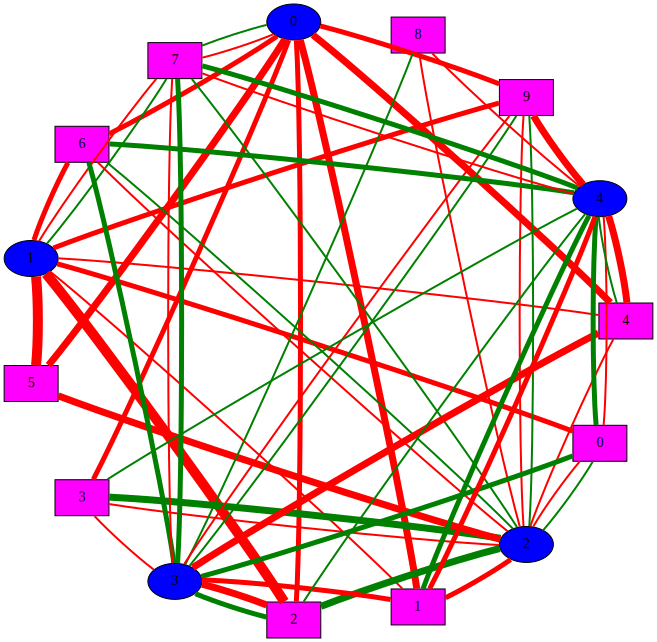

In [171]:
model_2.plot_graph(100, 200)

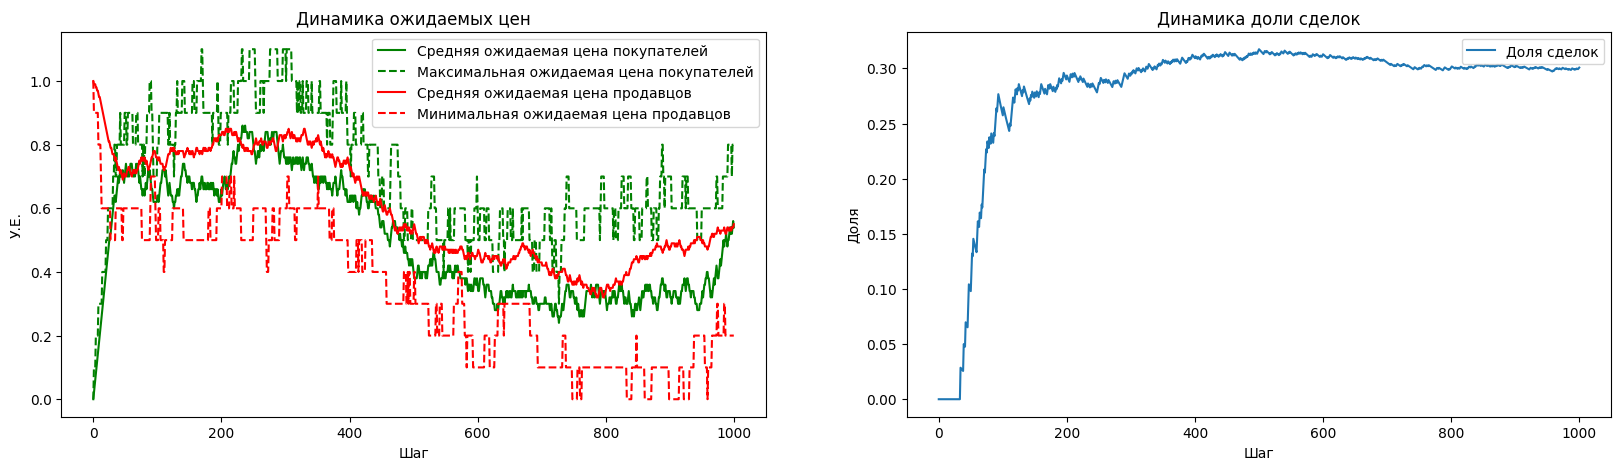

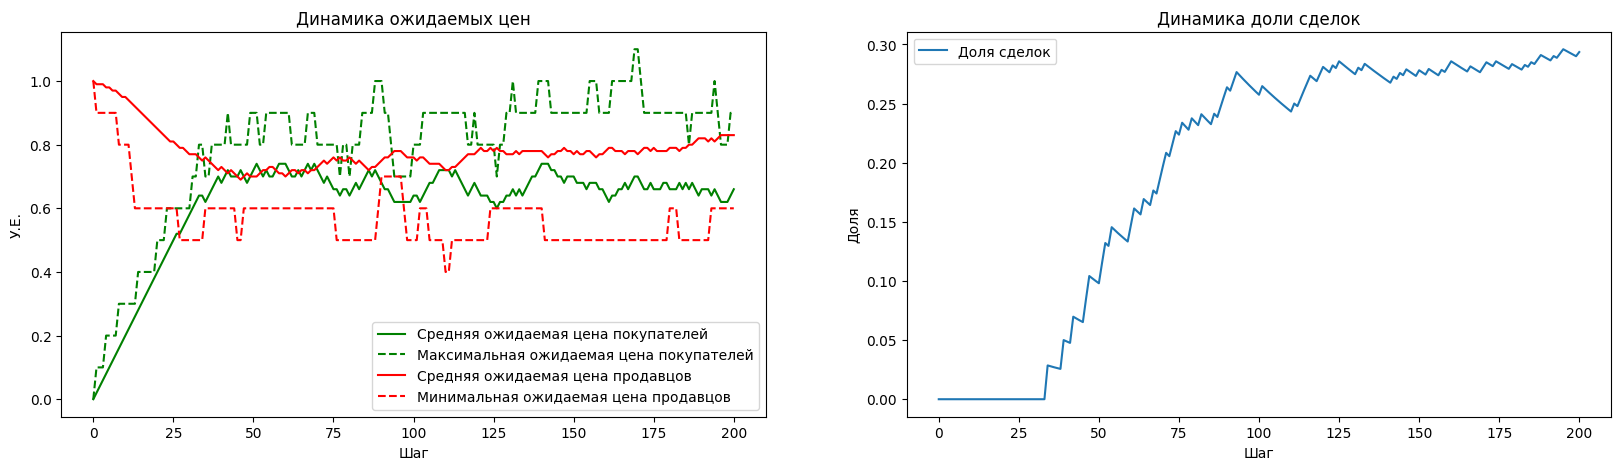

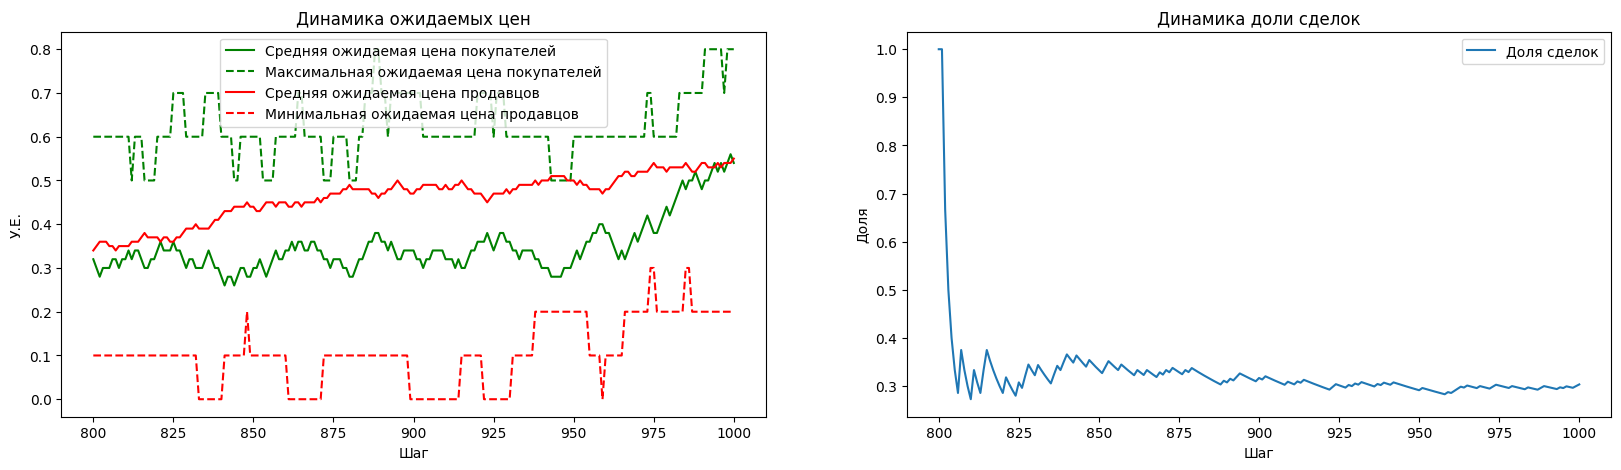

In [172]:
model_2.plot_dynamics(0, 1000)
model_2.plot_dynamics(0, 200)
model_2.plot_dynamics(800, 1000)

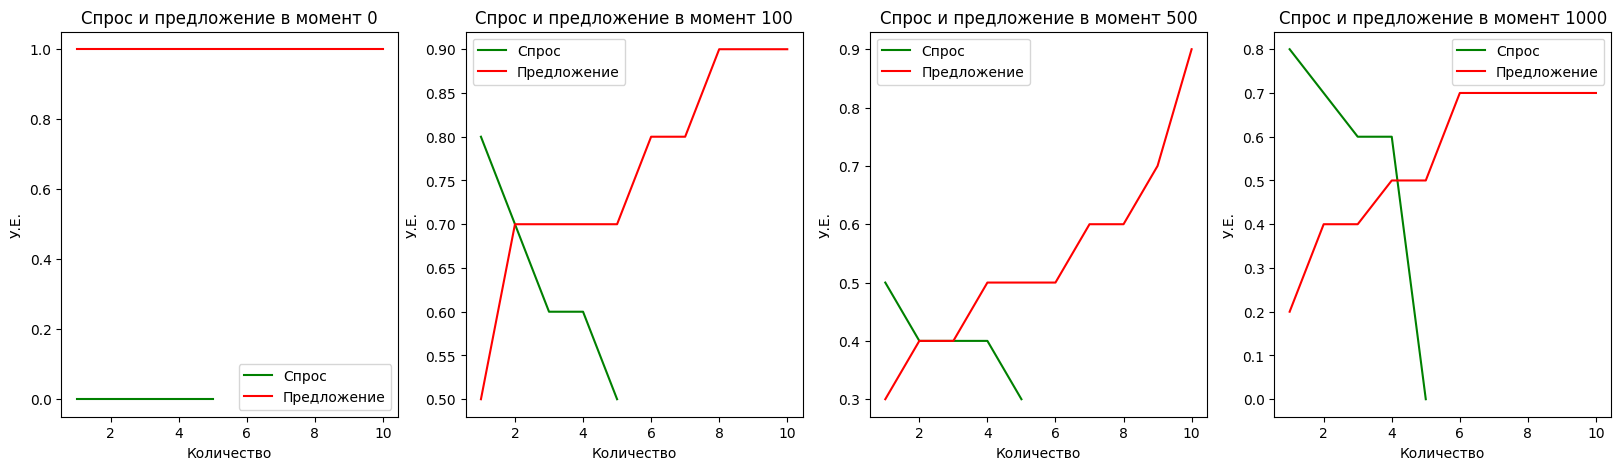

In [15]:
model_2.plot_supply_and_demand([0, 100, 500, 1000])

## Задание 3 (3 балла)

Предположим, что теперь мы рассматриваем последовательные дни, и контакты продавцов и покупателей происходят в течение дня. Количество контактов между продавцами и покупателями в день ограничено константой max_connections, и не меняется в процессе моделирования.

Выделим локальные (внутридневные) параметры, которые меняются и учитываются в течение одного дня. Но на следующий день сбрасываются до исходных значений. 

Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

1. Локальные параметры: количество сделок агента. Не может быть более одной сделки.
2. Локальные параметры: у каждого продавца свое фиксированное количество товара, которое он может продать в один день. В конце для излишки сгорают.
3. Локальные параметры: у каждого покупателя свое фиксированное количество товара, которое он может купить в один день. 
4. Локальные параметры: у каждого продавца случайное количество товара, которое он может продать в один день. В конце для излишки сгорают.
5. Локальные параметры: у каждого покупателя случайное количество товара, которое он может купить в один день.

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.

### Модель 5

##### Описание :

Введем метрику в днях: объекту класса Consumer добавим поля max_quantity - это будет случайное количество товара, которое конкретный потребитель будет готов купить. Значение этого поле определяется рандомно в пределах 10 (из соображения отношения с количеством итераций) и целочисленное.
Также добавляется поле num_of_goods, отражающее текущее количество, купленное конкретным потребителем. 

Модернизируем функцию run и deal в модели:

В run будем вести количество совершенных взаимодействий и будет производить массовое обнуление текущих количеств у каждого потребителя каждый раз, когда оно становится равным max_connections (максимальное количество сделок в день - это новое поле класса Model_3), это символизируем начало нового дня (для этого реализована соответствующая функция new_day_of_one_consumer).

Теперь сделка будет заключаться, если конкретный потребитель "укладывается в норму потребления", будем учитывать в статистике только такие случаи, иначе будет считать, что потребитель уже потребил "дневную норму" и далее не участвует во взаимодействии. Исключим из статистики эти случаи, для этого введем новый вариант результата функции deal (код исхода : 2).

#####  Интерпретация: 
При реализации модели на графике доли сделок появляются выраженные колебания - это связано с появлением периодичности в модели и определение точки насыщения у агентов, при достижении которых сделки совершаться не будут.
С появлением периодичности сделок стало значительно меньше. Судя по опытам выше на количество сделок влияло количество агентов, простировав аналогичным образом, получим, что максимальная доля успешных сделок не превзойдет 0.3, и будет тем больше, чем больше потребителей на рынке (что логично, так как в принципе существование потребителей, предъявляющих спрос на товар, обосновывает наличие рынка). Во всех случаях наблюдается слабое затухающие колебание количество сделок, причем (в зависимости от объема рынка) оно в итоге в пределе стремится к 0 или маленькому значению (чаще около 0.1). 

Если увеличить количество итераций, то затухающее колебание станет явнее.


Отмеченное выше актуально для достаточно большого количество сделок в день (max_connections), при уменьшении его, колебания не будут так заметны, это объясняется тем, что мы как будто уменьшили масштаб графиков, так можно точнее увидеть тренд, так можно сделать вывод, что доля сделок все же растет, однако достаточно медленно, это обусловлено особенностями базовой модели, описанными выше. 

In [202]:
def mean(lst):
    return sum(lst)/len(lst)

class Consumer_3:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta
        # Новое поле - максимальное количество товара, который может купить данный потребитель
        self.max_quantity = random.randrange(5)
        self.num_of_goods  = 0
        

        
    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta
        
    def new_day_of_one_consumer(self):
        self.num_of_goods = 0

class Seller_3:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta


class Model_3:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta, max_connections):
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer_3(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        # Список всех покупателей модели
        self.sellers = [Seller_3(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []
        self.deals_results = []
        
        # Добавявлем поле с максимальным количеством сделок в день
        self.max_connections = max_connections


    def deal(self, consumer_id, seller_id):
     
        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])

        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

        if (self.consumers[consumer_id].num_of_goods <= self.consumers[consumer_id].max_quantity):
            if (self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price):
                # Сделка состоялась
                # Записываем факт состоявшейся сделки
                self.deals_results.append({
                    'consumer_id' : consumer_id,
                    'seller_id' : seller_id,
                    'result' : 1
                    })

                # Данный покупатель решает уменьшить у себя expect_price
                self.consumers[consumer_id].decrease_expect_price()
                self.consumers[consumer_id].num_of_goods += 1

                # Данный продавец решает увеличить у себя expect_price
                self.sellers[seller_id].increase_expect_price()

            else :
                # Сделка не состоялась, требуется перебалансировка значений 
                # Записываем факт несостоявшейся сделки
                self.deals_results.append({
                    'consumer_id' : consumer_id,
                    'seller_id' : seller_id,
                    'result' : 0
                    })

                # Данный покупатель решает увеличить у себя expect_price
                self.sellers[seller_id].decrease_expect_price()

                # Данный продавец решает уменьшить у себя expect_price
                self.consumers[consumer_id].increase_expect_price()
            
        else : 
            # Сделка не состоялась из-за отсутствия у потребителя желания участвовать в сделке
            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 2
                })

    

    def run(self, num_of_steps):
        
        # Создаем переменную, которая считает количество сделок и будем обнулять ее
        # при достижении значения max_connections
        num_of_connections = 0
        
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бар
            
            if num_of_connections == self.max_connections:
                num_of_connections = 0
                # каждый новый день в нашем заведении начинается одинаково : 
                for i in range(self.num_of_consumers):
                    self.consumers[i].new_day_of_one_consumer()
                    
            
            
            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)
            
            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)
            
            # Моделируем сделку
            self.deal(consumer_id, seller_id)
            
            num_of_connections += 1

            
            
            
            
    def plot_dynamics(self, start, end):
        
        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
        
        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            if (self.deals_results[i]['result']== 2):
                deals_sum.append(deals_sum[-1] + 0)
            else :
                deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
                
                
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        
        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию. 
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")
            
            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию. 
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):

        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок 
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end    
        for i in range(start, end+1):
            
            
            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            elif self.deals_results[i]['result'] == 1 :
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count']+= 1
            else : # Если сделка не состоялась из-за отсутсвия у потербителя желания платить, то ничего не происходит
                pass
            
            
        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            if max_value == 0:
                return "0"
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph

In [209]:
random.seed(42)
model_3 = Model_3(num_of_consumers=10,
              num_of_sellers=10,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1,
                max_connections = 600)
model_3.run(10000)

100%|█████████████████████████████████| 10001/10001 [00:00<00:00, 232380.49it/s]


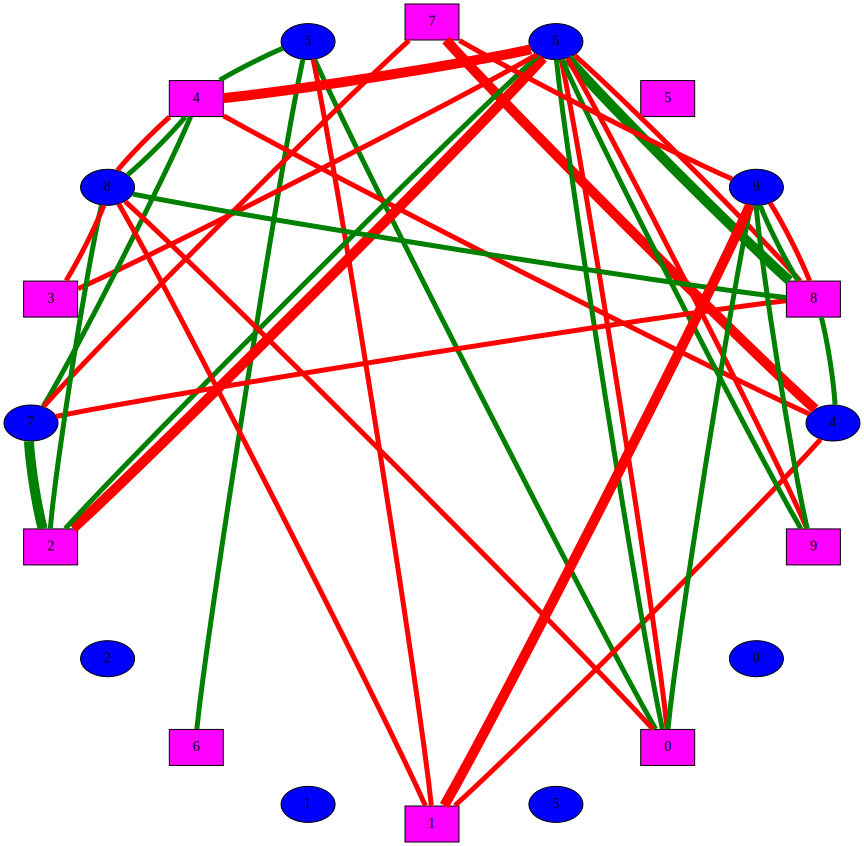

In [210]:
model_3.plot_graph(100, 200)

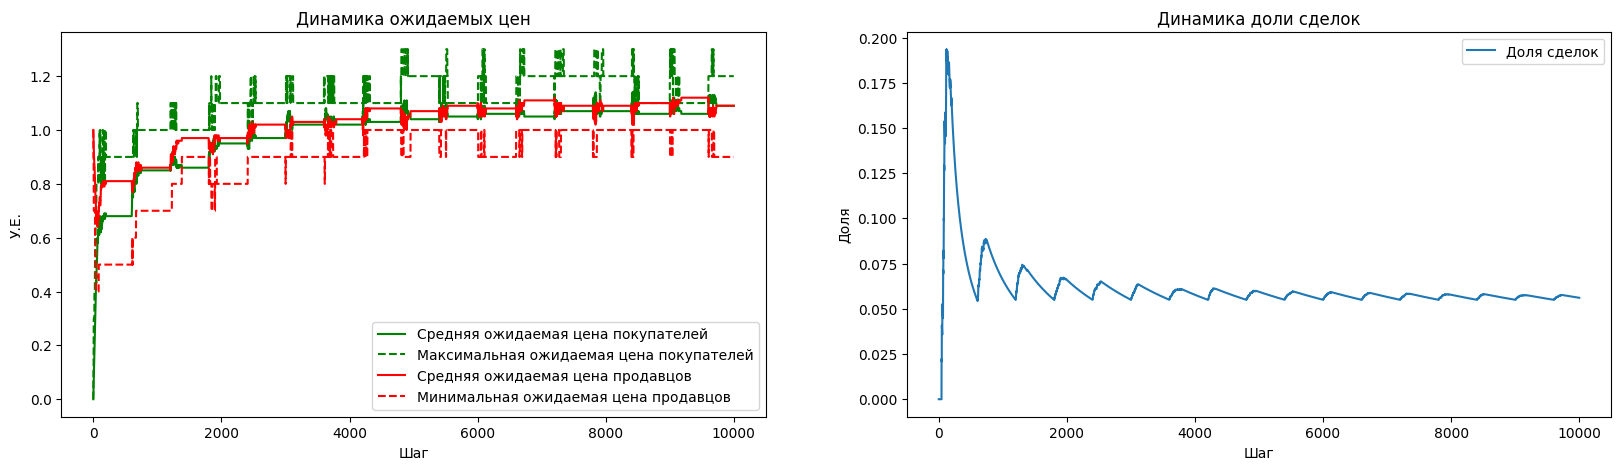

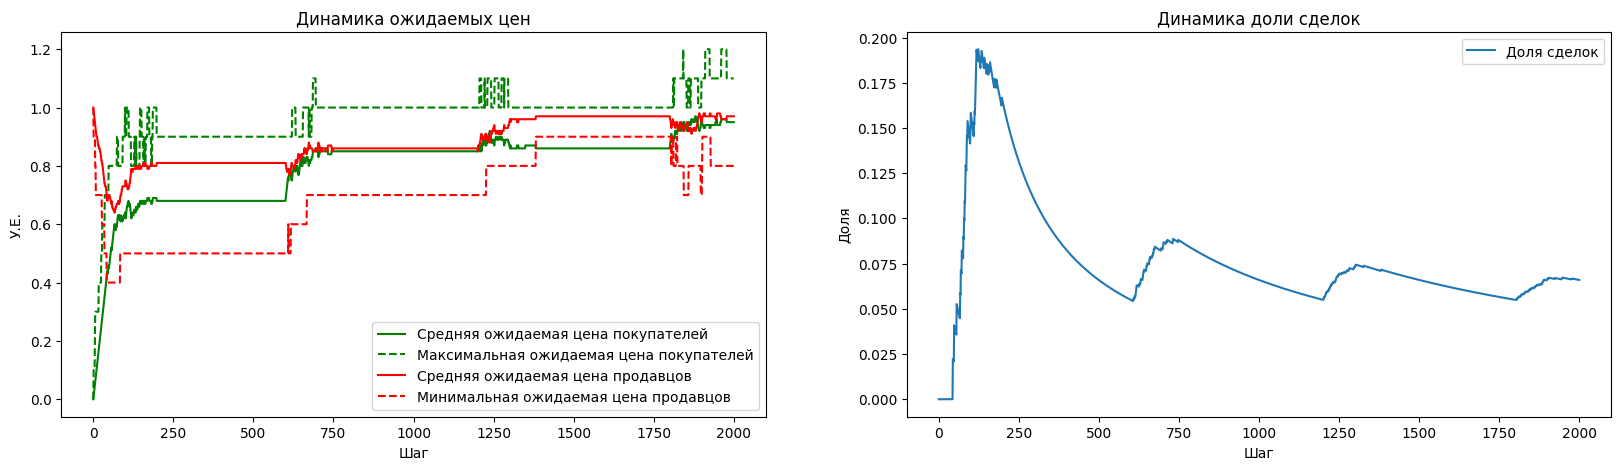

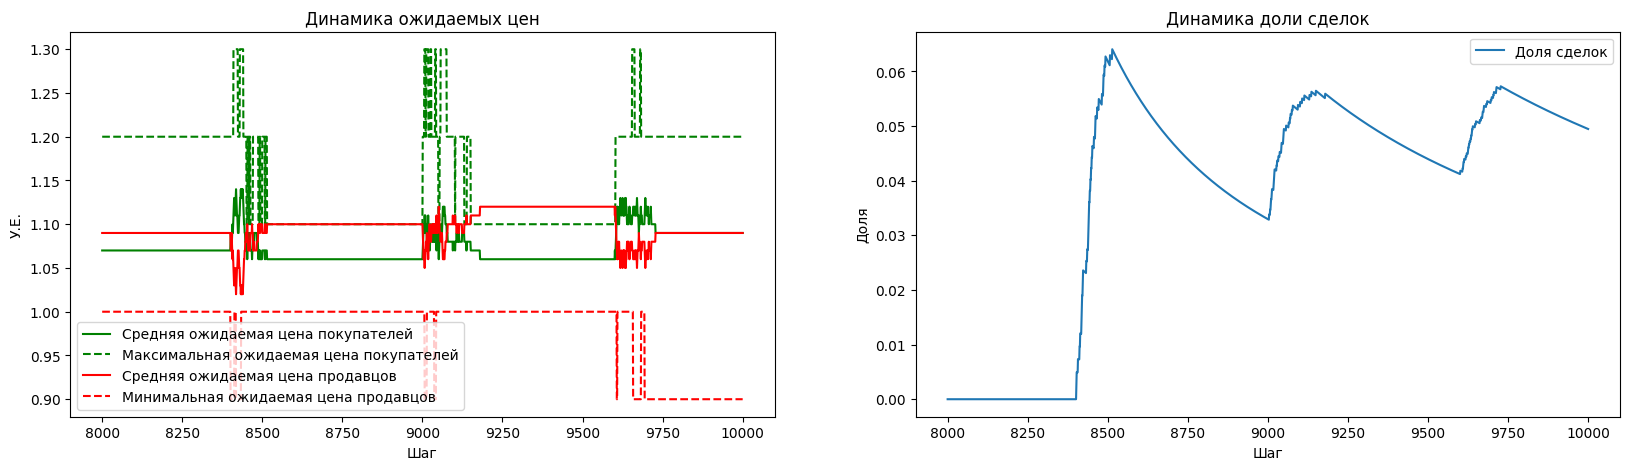

In [211]:
model_3.plot_dynamics(0, 10000)
model_3.plot_dynamics(0, 2000)
model_3.plot_dynamics(8000, 10000)


## Задание 4 (4 балла)


Придумайте свою модификацию модели, в которой отражены другие черты реальных рынков.

<b><font color="red">!</font> Перед выполнением задания необходимо <a href="https://docs.google.com/forms/d/e/1FAIpQLSdYmodGU144W_1L45tfIGmGpK9_0yRlVp7XeSG4yKfUGCkMTg/viewform">согласовать</a> Вашу идею с преподавателем. Ваше предложение не должно совпадать с предыдущими модификациями или модификациями других студентов.
Все согласованные предложения от студентов будут отображаться в <a href="https://docs.google.com/spreadsheets/d/1enXCHHBGYJA1iAUvuDj7TYCyBIHjX3rtZ5D4FIXnbZ8/edit?usp=sharing">таблице</a>.</b>

* Продемонстрируйте и опишите работу модифицированной модели.
* По возможности сделайте ее визуализацию.
* Проинтерпретируйте результаты работы модели.

#### Описание модели

Новая модель называется "Отрицательный внешний эффект от совершения сделки или рынок идеальных курильщиков":

Здесь и далее считаем, что все производители производят одинаковый товар и все потребители знакомы с рынком, покупают это благо, однако уведомлены о его негативном эффекте и принимают решение о потреблении этого блага только если получили достаточное удовольствие от него, в ином случае они не участвуют во взаимодействии.
пусть заключение сделки между i-ым покупателем j-ым продавцом сопряжено с некоторым негативным внешних эффектом для других потребителей. Для этого введем показатель полезность для каждого потребителя (соответствующее поле класса). Пусть потребители считают все товары одинаково ценными, при заключении сделки между i-ым покупателем j-ым продавцом первому добавляется в полезность рандомная величина (в каждый момент по-разному ценит потребитель), в это же время у каждого другого потребителя вычитается рандомная величина из полезности. В момент заключения сделки проверяется величина полезности, если она превосходит среднюю полезность по всем потребителям, то сделка заключается, иначе - нет.

  Добавим в метод модели функцию подсчет средней полезности - величины, отражающей средний уровень удовлетворенности потребителей благом,в остальном реализация модели похожа на модель 3 (в случае, если текущая полезность потребителя меньше средней, то считаем, что потребитель не участвует во взаимодействии, так как не достаточно удовлетворен этим благом).
    
#### Интерпретация:

Заметим, что количество сделок будет очень маленьким, и на 10.000 итераций едва превзойдет 0.1 (пик доли, если отношение количества потребителей к количеству производителей лежит в промежутке $[1.5, 2]$).

Это связано с тем, что потребители в постепенно изменяют предпочтения в потреблении товара так как из полезность становится все меньше при совершении сделок. 

Если сделать потребителей более активными (увеличить потребительскую дельту), то ситуация не сильно поменяться, так как цена оказывает меньшее влияние на предпочтения потребителей, чем полезность, при увеличении количества итераций до 10.000.

Не оказывает также ощутимого влияния тот факт, что мы увеличиваем полезность на 10 юбилей , а уменьшает на 5 стилей : если сделать их равными или поменять значения местами, то в долгосрочном периоде (пусть это те же 10.000 итераций) все равно будет доля сделок стремится к 0.1 или к меньшему числу, если рынок будет сильно смещен по количеству агентов каждого типа или сбалансирован (если это не ситуация, если отношение количества потребителей к количеству производителей лежит в промежутке $[1.5, 2]$).


Замечание : если попробовать поставить такие параметры, которые увеличивали бы очень сильно количество сделок в базовой модели, то в текущей модели в долгосрочном периоде доля сделок стабилизируется на уровне 0.1.

Вывод: если заключение сделки будет сопряжено с негативным внешним эффектом, влияние которого изменяет предпочтения потребителей, то доля заключаемых сделок будет сравнительно небольшой и в максимальном случае примерно каждая 10 сделка будет успешной. Если рассмотреть начало взаимодействия, то сначала будет наблюдаться резкий доли сделок, который потом упадет и стабилизируется на низком уровне, что демонстрирует влияние внешнего эффекта.

In [257]:
def mean(lst):
    return sum(lst)/len(lst)


class Consumer_4:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta
        self.utility = 0

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta
        
    '''
        в случае заключения сделки агент получает некоторый положительный прирост полезности, 
        так как согласно базовой модели, мы работаем с нормальным благом
    '''
    def dealing(self):
        self.utility += random.randrange(10)
    
    
    '''
        представленная ниже функция реализуется
        в случае, если агент - третье лицо в момент заключения сделки, 
        то он теряет в полезности некоторую произвольую величину  
        (произвольная, потому что каждый человек по-разному реагирует на конкретный негативный эффект)
    '''
    def external_affects(self):
        self.utility -= random.randrange(5)

class Seller_4:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta


class Model_4:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer_4(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        # Список всех покупателей модели
        self.sellers = [Seller_4(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок
        self.deals_results = []
        
        self.curr_mean_utility = 0


    def cout_mean_utility(self):
        curr_mean_utility = 0
        for i in range (self.num_of_consumers):
            curr_mean_utility += self.sellers[seller_id].utility
        self.curr_mean_utility  = curr_mean_utility/self.num_of_consumers
    
    def deal(self, consumer_id, seller_id):
        
        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        
        self.cout_mean_utility
        if self.consumers[consumer_id].utility >= self.curr_mean_utility:
            if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
                # Сделка состоялась
                # Записываем факт состоявшейся сделки
                self.deals_results.append({
                    'consumer_id' : consumer_id,
                    'seller_id' : seller_id,
                    'result' : 1
                    })

                # Данный покупатель решает уменьшить у себя expect_price
                self.consumers[consumer_id].decrease_expect_price()
                self.consumers[consumer_id].dealing()
                for i in range(self.num_of_consumers):
                    if i != consumer_id:
                        self.consumers[i].external_affects()

                # Данный продавец решает увеличить у себя expect_price
                self.sellers[seller_id].increase_expect_price()

            else:
                # Сделка не состоялась, нужна перекаллибровка модели
                # Записываем факт несостоявшейся сделки

                self.deals_results.append({
                    'consumer_id' : consumer_id,
                    'seller_id' : seller_id,
                    'result' : 0
                    })

                # Данный покупатель решает увеличить у себя expect_price
                self.sellers[seller_id].decrease_expect_price()

                # Данный продавец решает уменьшить у себя expect_price
                self.consumers[consumer_id].increase_expect_price()
        else :
            # Сделка не состоялась
            # Записываем факт несостоявшейся сделки

            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 2
                })

            
            

    def run(self, num_of_steps):
        
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара
            
            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)
            
            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)
            
            # Моделируем сделку
            self.deal(consumer_id, seller_id)
            

    def plot_dynamics(self, start, end):
        
        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
        
        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            if (self.deals_results[i]['result']== 2):
                deals_sum.append(deals_sum[-1] + 0)
            else :
                deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
            
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")
        


    def plot_supply_and_demand(self, pos_list):
        
        
        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))
        
        axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
        axs[i].legend()
        axs[i].set_xlabel("Количество")
        axs[i].set_ylabel("У.Е.")


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию. 
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")
            
            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию. 
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):

        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок 
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end    
        for i in range(start, end+1):
            
            
            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            elif self.deals_results[i]['result'] == 1:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1
            else : 
                pass
            
            
            
        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


In [263]:
random.seed(42)
model_4 = Model_4(num_of_consumers = 5,
              num_of_sellers=10,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=1,
               seller_min=0,
              seller_max=1,
              seller_delta=0.05)
model_4.run(10000)

100%|██████████████████████████████████| 10001/10001 [00:00<00:00, 41597.52it/s]


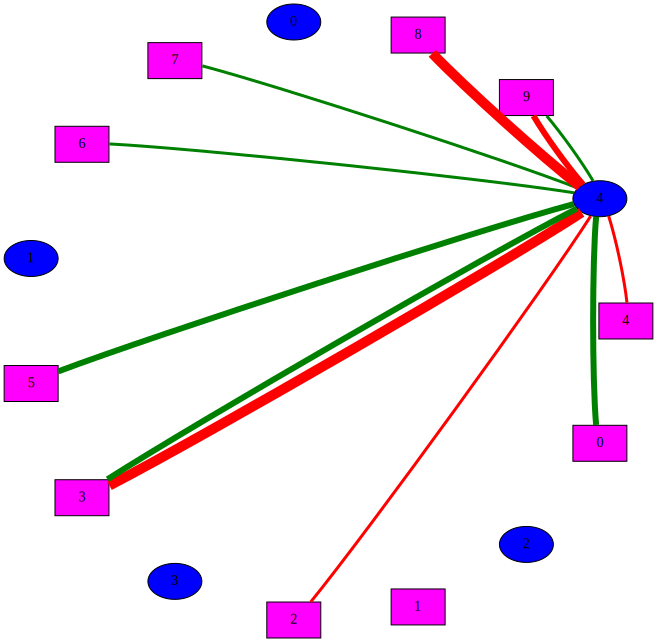

In [264]:
model_4.plot_graph(100, 200)

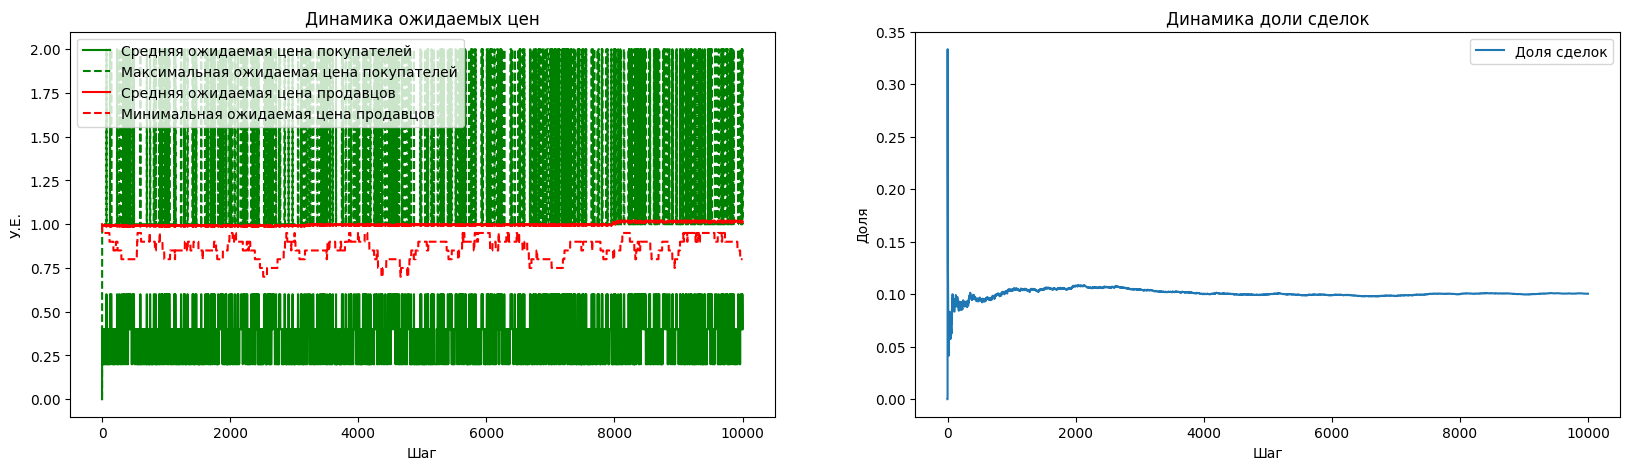

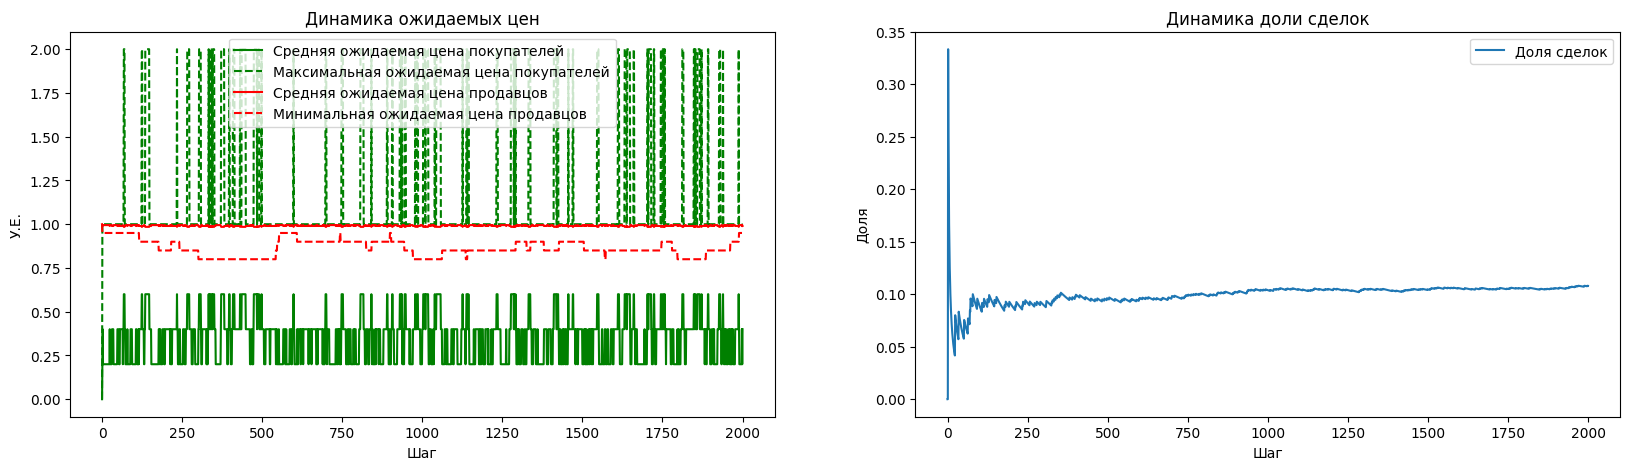

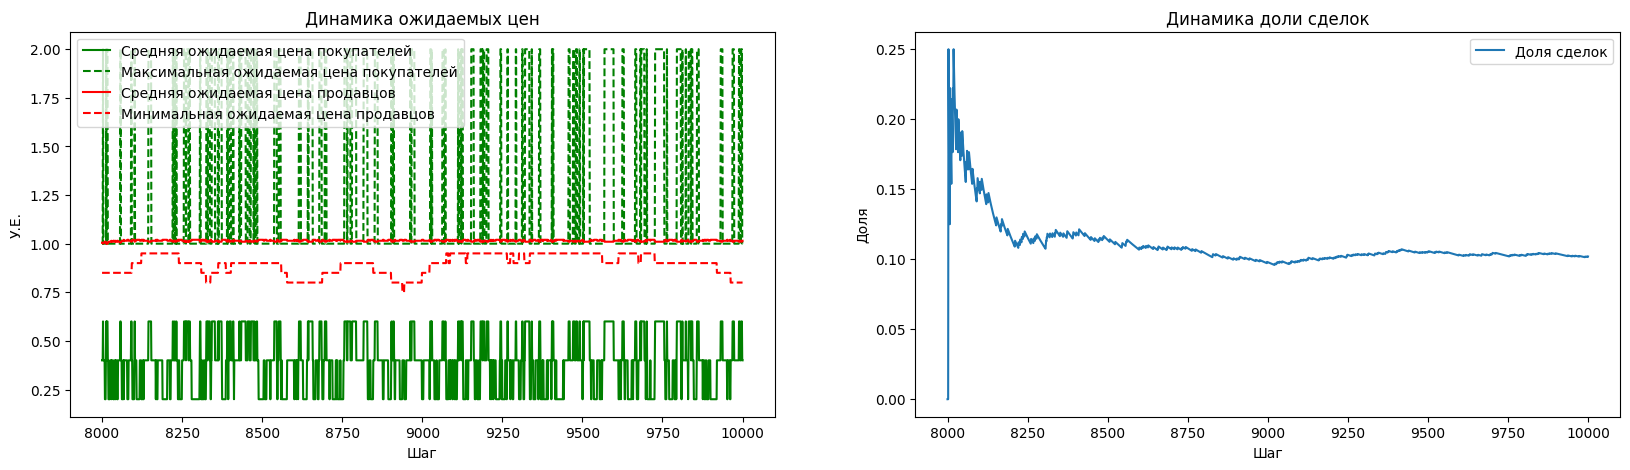

In [267]:
model_4.plot_dynamics(0, 10000)
model_4.plot_dynamics(0, 2000)
model_4.plot_dynamics(8000, 10000)